# Pump It Up: Data Mining the Water Table

**Can you predict which water pumps are faulty?**

Using data from Taarifa and the Tanzanian Ministry of Water, can you predict which pumps are functional, which need some repairs, and which don't work at all?

Predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed.

A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

_Website Link:_ https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/

In [1]:
# Gotta install some packages that aren't available in colab by default
!pip install tableone

  Using cached tableone-0.7.10-py2.py3-none-any.whl (32 kB)
     |████████████████████████████████| 16.1 MB 23.4 MB/s 
     |████████████████████████████████| 10.7 MB 581 kB/s 
     |████████████████████████████████| 227 kB 718 kB/s 
     |████████████████████████████████| 510 kB 10.1 MB/s 
     |████████████████████████████████| 30.9 MB 5.5 MB/s 
     |████████████████████████████████| 9.6 MB 11.2 MB/s 
     |████████████████████████████████| 231 kB 3.3 MB/s 


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
from tableone import TableOne, load_dataset

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 


/Users/KT/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/KT/opt/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/Users/KT/opt/anaconda3/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/Users/KT/opt/anaconda3/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
 

In [3]:
#4910797b-ee55-40a7-8668-10efd5c1b960.csv: Training Data
#0bf8bc6e-30d0-4c50-956a-603fc693d966.csv: Training Labels
#702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv: Test Data

# Load Data:
#import os
#print(os.getcwd())
#print(os.listdir('PumpItUp/raw_data'))
X_train = pd.read_csv("PumpItUp/raw_data/4910797b-ee55-40a7-8668-10efd5c1b960.csv")
y_train = pd.read_csv("PumpItUp/raw_data/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv")
train = X_train.merge(y_train, how = "outer", on = "id")

In [4]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [5]:
# Get Datatype info for the features (X variables) and target Y
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [6]:
# Are there any columns with missing values?
missing_fields = train.columns[train.isnull().any()]
missing_fields

Index(['funder', 'installer', 'subvillage', 'public_meeting',
       'scheme_management', 'scheme_name', 'permit'],
      dtype='object')

In [7]:
# How many missing values are there?
train[missing_fields].isnull().sum()

funder                3635
installer             3655
subvillage             371
public_meeting        3334
scheme_management     3877
scheme_name          28166
permit                3056
dtype: int64

In [8]:
train['scheme_name'].value_counts()

K                             682
None                          644
Borehole                      546
Chalinze wate                 405
M                             400
                             ... 
Sero water scheme               1
Kibaon                          1
Kasahunga pipe scheme           1
NYA /MAK BUK/ piped scheme      1
nyaluhande                      1
Name: scheme_name, Length: 2696, dtype: int64

In [9]:
scheme_name_missing = train['scheme_name'].fillna("missing")
scheme_name_missing_count = scheme_name_missing.value_counts()

# Save in Excel
scheme_name_missing_count.to_excel('PumpItUp - scheme_name_missing_count.xlsx')

In [10]:
train['funder'].value_counts()

Government Of Tanzania          9084
Danida                          3114
Hesawa                          2202
Rwssp                           1374
World Bank                      1349
                                ... 
Ms-danish                          1
Mhuzu                              1
Kitiangare Village Community       1
Wamissionari Wa Kikatoriki         1
Sema S                             1
Name: funder, Length: 1897, dtype: int64

In [11]:
funder_missing = train['funder'].fillna("missing")
funder_missing_count = funder_missing.value_counts()

# Save in Excel
funder_missing_count.to_excel('PumpItUp - funder_missing_count.xlsx')

Far too many categories for `funder` and `scheme_name` and the values don't make much sense.. I am going to exclude this field.

In [12]:
train['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [13]:
train['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [14]:
public_meeting_missing = train['public_meeting'].isna()
public_meeting_missing.value_counts()

False    56066
True      3334
Name: public_meeting, dtype: int64

Since the `public_meeting` field is an integer field, the missing rows of 3334 can be changed to **"True"** as there are 51011 out of 59400 that are **"True"** and 5055 out of 59400 are **"False"**.
To avoid tipping the scales to the other side, imputing missing values to be **"True"** is the best decision for `public_meeting`.

In [15]:
train['public_meeting'] = train['public_meeting'].fillna(True)
train['public_meeting'].value_counts()

True     54345
False     5055
Name: public_meeting, dtype: int64

In [16]:
# Checking if this worked...
train['public_meeting'].isna().sum()

0

In [17]:
train['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [18]:
permit_missing = train['permit'].isna()
permit_missing.value_counts()

False    56344
True      3056
Name: permit, dtype: int64

Since the `permit` field is an integer field, the missing rows of 3056 can be changed to **"True"** as there are 38852 out of 59400 that are **"True"** and 17492 out of 59400 are **"False"**.
To avoid tipping the scales to the other side, imputing missing values to be **"True"** is the best decision for `permit`.

In [19]:
train['permit'] = train['permit'].fillna(True)
train['permit'].value_counts()

True     41908
False    17492
Name: permit, dtype: int64

In [20]:
# Checking if this worked...
train['permit'].isna().sum()

0

In [21]:
# How many missing values are there?
train[missing_fields].isnull().sum()

funder                3635
installer             3655
subvillage             371
public_meeting           0
scheme_management     3877
scheme_name          28166
permit                   0
dtype: int64

From the missing values section, we were able to impute values for `public_meeting` and `permit` as they both were boolean fields and should only have values **True** and **False**. We will now look at the descriptive statistics and feature engineering steps.

In those steps, we would be able to further break-down the multiple categories for the above mentioned fields: `installer`,`subvillage`,`scheme_management`. 

For `funder` and `scheme_name`, there are far too many categories. There are also some very sparse category names which makes it unclear. Due to this uncertainty, we can exclude these 2 fields during model building.

## Descriptive Statistics

In [22]:
train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


**Why would `construction_year` be 0?**

In [23]:
construction_year_check = train[train['construction_year'] == 0]
construction_year_check

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59384,72148,0.0,2011-07-10,Concern,0,CONCERN,30.667805,-2.483710,Chamkube,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
59392,40607,0.0,2011-04-15,Government Of Tanzania,0,Government,33.009440,-8.520888,Benard Charles,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
59393,48348,0.0,2012-10-27,Private,0,Private,33.866852,-4.287410,Kwa Peter,0,...,soft,good,insufficient,insufficient,dam,dam,surface,other,other,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional


In [24]:
# 20709 rows have the construction_year as 0... This is not good....
construction_year_check.shape

(20709, 41)

In [25]:
train['construction_year'].value_counts(bins=12).sort_index(ascending=True)

(-2.014, 167.75]     20709
(167.75, 335.5]          0
(335.5, 503.25]          0
(503.25, 671.0]          0
(671.0, 838.75]          0
(838.75, 1006.5]         0
(1006.5, 1174.25]        0
(1174.25, 1342.0]        0
(1342.0, 1509.75]        0
(1509.75, 1677.5]        0
(1677.5, 1845.25]        0
(1845.25, 2013.0]    38691
Name: construction_year, dtype: int64

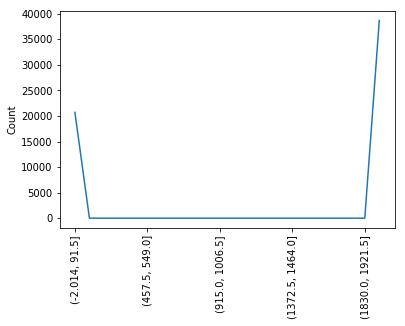

In [26]:
# Bar plot of target Y
train['construction_year'].value_counts(bins=22).sort_index(ascending=True).plot()
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

In [27]:
print("Min value: ", train['construction_year'].min())
print("Max value: ", train['construction_year'].max())
print("Mean value: ", train['construction_year'].mean())
print("Median value: ", train['construction_year'].median())
print("Mode value: ", train['construction_year'].mode())
print("Std value: ", train['construction_year'].std())

Min value:  0
Max value:  2013
Mean value:  1300.6524747474748
Median value:  1986.0
Mode value:  0    0
dtype: int64
Std value:  951.6205473153105


For `construction_year`, as per the analysis above, majority of the dataset collected has 1986 as the construction year, so it is best to impute 20709 rows that have a `construction_year` as **0** to be **1986**.

In [28]:
train['construction_year']=train['construction_year'].replace(0,train['construction_year'].median())

In [29]:
print("Min value: ", train['construction_year'].min())
print("Max value: ", train['construction_year'].max())
print("Mean value: ", train['construction_year'].mean())
print("Median value: ", train['construction_year'].median())
print("Mode value: ", train['construction_year'].mode())
print("Std value: ", train['construction_year'].std())

Min value:  1960
Max value:  2013
Mean value:  1993.0442929292929
Median value:  1986.0
Mode value:  0    1986
dtype: int64
Std value:  11.308410166585247


Rather than going through and describing all the categorical variables, we should try seeing the relative ratio of the number of unique categorical values to the number of records. A huge ratio indicates sparseness which is not for building any model. A solution to this is to combine levels, but in most cases, we just don't know enough about the data to do that.

In [30]:

#Columns to Describle
columns = ['amount_tsh','gps_height','installer','wpt_name','num_private','basin','subvillage','region','region_code',
           'district_code','lga','ward','population','public_meeting','recorded_by','scheme_management','scheme_name','permit','construction_year',
           'extraction_type','extraction_type_group','extraction_type_class','management','management_group','payment','water_quality','quality_group',
           'source','source_type','waterpoint_type','waterpoint_type_group','status_group']

categorical = ['installer','wpt_name','basin','subvillage','region','region_code','district_code','lga','ward','public_meeting',
               'recorded_by','scheme_management','scheme_name','permit','construction_year','extraction_type_group',
               'extraction_type_class','management','management_group','payment','payment_type','water_quality','quality_group','quantity',
               'quantity_group','source','source_type','source_class','waterpoint_type_group','status_group']

groupby = ['status_group']

nonnormal = ['amount_tsh','gps_height','population','construction_year']

labels = {'amount_tsh' : 'Total static head (amount water available to waterpoint)',
            'date_recorded' : 'The date the row was entered',
            'funder' : 'Who funded the well',
            'gps_height' : 'Altitude of the well',
            'installer' : 'Organization that installed the well',
            'longitude' : 'GPS coordinate Long',
            'latitude' : 'GPS coordinate Lat',
            'wpt_name' : 'Name of the waterpoint if there is one',
            'num_private' : 'num private',
            'basin' : 'Geographic water basin',
            'subvillage' : 'Geographic location (Subvillage)',
            'region' : 'Geographic location (Region)',
            'region_code' : 'Geographic location (region coded)',
            'district_code' : 'Geographic location (district coded)',
            'lga' : 'Geographic location (LGA)',
            'ward' : 'Geographic location (Ward)',
            'population' : 'Population around the well',
            'public_meeting' : 'Public Meeting True/False',
            'recorded_by' : 'Group entering this row of data',
            'scheme_management' : 'Who operates the waterpoint',
            'scheme_name' : 'Who operates the waterpoint - name',
            'permit' : 'If the waterpoint is permitted',
            'construction_year' : 'Year the waterpoint was constructed',
            'extraction_type' : 'The kind of extraction the waterpoint uses',
            'extraction_type_group' : 'The kind of extraction the waterpoint uses - group',
            'extraction_type_class' : 'The kind of extraction the waterpoint uses - class',
            'management' : 'How the waterpoint is managed',
            'management_group' : 'How the waterpoint is managed - group',
            'payment' : 'What the water costs',
            'payment_type' : 'What the water costs - pmt type',
            'water_quality' : 'The quality of the water',
            'quality_group' : 'The quality of the water - group',
            'quantity' : 'The quantity of water',
            'quantity_group' : 'The quantity of water - group',
            'source' : 'The source of the water',
            'source_type' : 'The source of the water - type',
            'source_class' : 'The source of the water - class',
            'waterpoint_type' : 'The kind of waterpoint',
            'waterpoint_type_group' : 'The kind of waterpoint - group'}


In [31]:
full = []
for var in categorical:
    levels = len(set(train[var].values)) #number of categorical levels
    ratio = levels/train.shape[0]
    row = pd.DataFrame(data = {'data':var, 'ratio': ratio}, index = [0])
    full.append(row)
full = pd.concat(full).sort_values('ratio')
full

,data,ratio
0,recorded_by,0.000017
0,permit,0.000034
0,public_meeting,0.000034
0,status_group,0.000051
0,source_class,0.000051
0,management_group,0.000084
0,quantity,0.000084
0,quantity_group,0.000084
0,waterpoint_type_group,0.000101
0,quality_group,0.000101


Based off these results, I think we can exclude `lga`, `ward`, `installer`, `scheme_name`, `subvillage`, and `wpt_name`.

The above code is checking for cardinality (i.e. number of rows/categorical levels divided by the total number of rows in dataset). Some fields (`lga`, `ward`, `installer`, `scheme_name`, `subvillage`, and `wpt_name`) do not fall into the 5% statistical significance level. Hence at 5% significance level, we will exclude these from the data model.

In [32]:
columns = ['amount_tsh','gps_height','num_private','basin','region','region_code',
           'district_code','population','public_meeting','recorded_by','scheme_management','permit','construction_year',
           'extraction_type','extraction_type_group','extraction_type_class','management','management_group','payment','water_quality','quality_group',
           'source','source_type','waterpoint_type','waterpoint_type_group','status_group','payment_type','quantity','quantity_group','source_class']

categorical = ['basin','region','region_code','district_code','public_meeting',
               'recorded_by','scheme_management','permit','extraction_type_group',
               'extraction_type_class','management','management_group','payment','payment_type','water_quality','quality_group','quantity',
               'quantity_group','source','source_type','source_class','waterpoint_type_group','status_group','extraction_type', 'waterpoint_type']

In [33]:
table = TableOne(train, 
                 columns = columns, 
                 categorical = categorical,
                #  groupby = groupby, 
                 nonnormal = nonnormal,
                 labels = labels,
                 groupby=['status_group'],
                 pval=True)
print(table.tabulate(tablefmt = "fancy_grid"))
#status_group = f(everything else)

 (20.1)           │ 5919 (18.3)            │ 508 (11.8)                │ 5522 (24.2)            │ <0.001    │
├──────────────────────────────────────────────────────────────────────────┼─────────────────────────────┼───────────┼────────────────────────┼────────────────────────┼───────────────────────────┼────────────────────────┼───────────┤
│                                                                          │ dam                         │           │ 656 (1.1)              │ 253 (0.8)              │ 24 (0.6)                  │ 379 (1.7)              │           │
├──────────────────────────────────────────────────────────────────────────┼─────────────────────────────┼───────────┼────────────────────────┼────────────────────────┼───────────────────────────┼────────────────────────┼───────────┤
│                                                                          │ other                       │           │ 278 (0.5)              │ 158 (0.5)              │ 5 (0.1)            

In [34]:
# Save Descriptive Statistics in Excel
table.to_excel('PumpItUp - Descriptive Statistics table.xlsx')

The following categorical variables were found to be too sparse and will be excluded:

* `installer`
* `wpt_name`

### Target variable

In [35]:
# count the number of rows for each target category
train['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

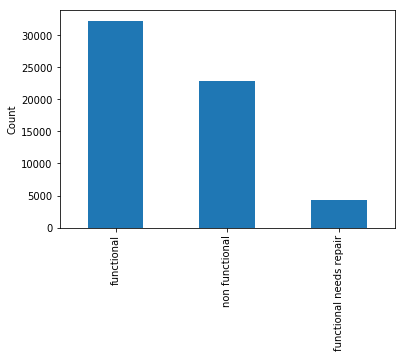

In [36]:
# Bar plot of target Y
train['status_group'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.show()

### Feature Engineering

Selecting and renaming variables.
This is to reduce the number of independent variables in the statistical model.

In [37]:
# List of column names
train_columns = columns[:]
train_columns

['amount_tsh',
 'gps_height',
 'num_private',
 'basin',
 'region',
 'region_code',
 'district_code',
 'population',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'water_quality',
 'quality_group',
 'source',
 'source_type',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group',
 'payment_type',
 'quantity',
 'quantity_group',
 'source_class']

In [38]:
# No. of Unique values in features
for i in train_columns:
  n = train[i].unique()
  if len(n) < 20:
    print(i, " : ", train[i].nunique(), " Volume count")
    print(i, " : ", n, " Unique values")
  else:
    print(i, " : ", str(len(n)), " Unique values")

amount_tsh  :  98  Unique values
gps_height  :  2428  Unique values
num_private  :  65  Unique values
basin  :  9  Volume count
basin  :  ['Lake Nyasa' 'Lake Victoria' 'Pangani' 'Ruvuma / Southern Coast'
 'Internal' 'Lake Tanganyika' 'Wami / Ruvu' 'Rufiji' 'Lake Rukwa']  Unique values
region  :  21  Unique values
region_code  :  27  Unique values
district_code  :  20  Unique values
population  :  1049  Unique values
public_meeting  :  2  Volume count
public_meeting  :  [ True False]  Unique values
recorded_by  :  1  Volume count
recorded_by  :  ['GeoData Consultants Ltd']  Unique values
scheme_management  :  12  Volume count
scheme_management  :  ['VWC' 'Other' nan 'Private operator' 'WUG' 'Water Board' 'WUA'
 'Water authority' 'Company' 'Parastatal' 'Trust' 'SWC' 'None']  Unique values
permit  :  2  Volume count
permit  :  [False  True]  Unique values
construction_year  :  54  Unique values
extraction_type  :  18  Volume count
extraction_type  :  ['gravity' 'submersible' 'swn 80' 'nir

In [39]:
#Added 03/05. We can use this on both the training set and test set.


def recode(df):
    # Regrouping specific independent variables
    df['district_code_recoded'] = np.where(df['district_code'] <= 4, 'District Codes 1-4', 'Other Districts')

    df['scheme_management_recoded'] = np.where(df['scheme_management'] == 'VWC', 'VWC', 'Other')

    df['extraction_type_recoded'] = np.where(df['extraction_type'] == 'gravity', 'gravity', 'other')
    
    df['management_recoded'] = np.where(df['management'] == 'vwc', 'vwc', 'other')
    df['management_group_recoded'] = np.where(df['management_group'] == 'user-group', 'user-group', 'other')

    df['payment_recoded'] = np.where(df['payment'] == 'never pay', 'never pay', 'other') #repetition ??
    df['payment_type_recoded'] = np.where(df['payment_type'] == 'never pay', 'never pay', 'other') #repetition ??

    df['water_quality_recoded'] = np.where(df['water_quality'] == 'soft', 'soft', 'other') #repetition ??
    df['quality_group_recoded'] = np.where(df['quality_group'] == 'good', 'good', 'other') #repetition ??

    df['source_recoded'] = np.where(~df['source'].isin(['shallow well','spring']), 'other', df['source']) #repetition ??
    df['source_type_recoded'] = np.where(~df['source_type'].isin(['shallow well','spring','borehole','river/lake']), 'other', df['source_type']) #repetition ??
    df['source_class_recoded'] = np.where(~df['source_class'].isin(['groundwater','surface']), 'other', df['source_class'])

    df['waterpoint_type_recoded'] = np.where(~df['waterpoint_type'].isin(['communal standpipe','hand pump']), 'other', df['waterpoint_type']) #repetition ??
    df['waterpoint_type_group_recoded'] = np.where(~df['waterpoint_type_group'].isin(['communal standpipe','hand pump']), 'other', df['waterpoint_type_group']) #repetition ??

    df['quantity_recoded'] = np.where(~df['quantity'].isin(['enough','insufficient']), 'other', df['quantity']) #repetition ??
    df['quantity_group_recoded'] = np.where(~df['quantity_group'].isin(['enough','insufficient']), 'other', df['quantity_group']) #repetition ??

    return df

In [40]:
# Run the function above
train=recode(train)

In [41]:
train.shape

(59400, 57)

In [42]:
# Recoded and clean Dataset

columns = ['amount_tsh','gps_height','num_private','basin','region','region_code',
           'district_code','district_code_recoded','population','public_meeting','recorded_by',
           'scheme_management','scheme_management_recoded','permit','construction_year',
           'extraction_type','extraction_type_recoded','extraction_type_group','extraction_type_class',
           'management','management_recoded','management_group','management_group_recoded',
           'payment','payment_recoded','payment_type','payment_type_recoded',
           'water_quality','water_quality_recoded','quality_group','quality_group_recoded',
           'source','source_recoded','source_type','source_type_recoded','source_class','source_class_recoded',
           'waterpoint_type','waterpoint_type_recoded','waterpoint_type_group','waterpoint_type_group_recoded',
           'quantity','quantity_recoded','quantity_group','quantity_group_recoded',
           'status_group']

categorical = ['basin','region','region_code','district_code','district_code_recoded','public_meeting',
               'recorded_by','scheme_management','scheme_management_recoded','permit',
               'extraction_type','extraction_type_recoded','extraction_type_group','extraction_type_class',
               'management','management_recoded','management_group','management_group_recoded',
               'payment','payment_recoded','payment_type','payment_type_recoded',
               'water_quality','water_quality_recoded','quality_group','quality_group_recoded','quantity','quantity_recoded',
               'quantity_group','quantity_group_recoded','source','source_recoded','source_type','source_type_recoded',
               'source_class','source_class_recoded','waterpoint_type_group','waterpoint_type_group_recoded',
               'waterpoint_type', 'waterpoint_type_recoded','status_group']

In [43]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type_recoded,water_quality_recoded,quality_group_recoded,source_recoded,source_type_recoded,source_class_recoded,waterpoint_type_recoded,waterpoint_type_group_recoded,quantity_recoded,quantity_group_recoded
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,other,soft,good,spring,spring,groundwater,communal standpipe,communal standpipe,enough,enough
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,other,other,surface,communal standpipe,communal standpipe,insufficient,insufficient
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,other,soft,good,other,other,surface,other,communal standpipe,enough,enough
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,other,borehole,groundwater,other,communal standpipe,other,other
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,other,other,surface,communal standpipe,communal standpipe,other,other


In [44]:
table = TableOne(train, 
                 columns = columns, 
                 categorical = categorical,
                #  groupby = groupby, 
                 nonnormal = nonnormal,
                 labels = labels,
                 groupby=['status_group'],
                 pval=True)
print(table.tabulate(tablefmt = "fancy_grid"))
#status_group = f(everything else)

 (22.4)           │ 7266 (22.5)            │ 1571 (36.4)               │ 4491 (19.7)            │           │
├──────────────────────────────────────────────────────────────────────────┼─────────────────────────────┼───────────┼────────────────────────┼────────────────────────┼───────────────────────────┼────────────────────────┼───────────┤
│                                                                          │ unknown                     │           │ 278 (0.5)              │ 158 (0.5)              │ 5 (0.1)                   │ 115 (0.5)              │           │
├──────────────────────────────────────────────────────────────────────────┼─────────────────────────────┼───────────┼────────────────────────┼────────────────────────┼───────────────────────────┼────────────────────────┼───────────┤
│ source_class_recoded, n (%)                                              │ groundwater                 │ 0         │ 45794 (77.1)           │ 24835 (77.0)           │ 2741 (63.5)        

In [45]:
# Save Descriptive Statistics in Excel
table.to_excel('PumpItUp - Descriptive Statistics table - after recoding.xlsx')

Crosstabs to check if the independent variables have a similar distribution and/or related to one another? Or if it is all random.

In [46]:
# Checking for homoscedasticity - correlation within indepedendent variables that already exists!

pd.crosstab(train['region'],train['region_code'],margins=True)

region_code,1,2,3,4,5,6,7,8,9,10,...,19,20,21,24,40,60,80,90,99,All
region,,,,,,,,,,,,,,,,,,,,,
Arusha,0,3024,0,0,0,0,0,0,0,0,...,0,0,0,326,0,0,0,0,0,3350
Dar es Salaam,0,0,0,0,0,0,805,0,0,0,...,0,0,0,0,0,0,0,0,0,805
Dodoma,2201,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2201
Iringa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5294
Kagera,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3316
Kigoma,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2816
Kilimanjaro,0,0,4379,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4379
Lindi,0,0,0,0,0,0,0,300,0,0,...,0,0,0,0,0,0,1238,0,0,1546
Manyara,0,0,0,0,0,0,0,0,0,0,...,0,0,1583,0,0,0,0,0,0,1583


For above crosstab of `region` and `region_code`, there are 21 regions but 27 region codes! Since there is an overlap of region codes, we will exclude `region_code`. Also this reduces multi-collinearity in the dataset.

**Note:** *Multicollinearity refers to a situation in which more than two explanatory variables in a multiple regression model are highly linearly related.*

In [47]:
# Checking for homoscedasticity - correlation within indepedendent variables that already exists!

pd.crosstab(train['district_code'],train['district_code_recoded'],margins=True, normalize=True)

district_code_recoded,District Codes 1-4,Other Districts,All
district_code,,,
0,0.000387,0.000000,0.000387
1,0.205438,0.000000,0.205438
2,0.188098,0.000000,0.188098
3,0.168316,0.000000,0.168316
4,0.151498,0.000000,0.151498
5,0.000000,0.073333,0.073333
6,0.000000,0.068586,0.068586
7,0.000000,0.056279,0.056279
8,0.000000,0.017559,0.017559


In [48]:
# Checking for homoscedasticity - correlation within indepedendent variables that already exists!

pd.crosstab(train['scheme_management'],train['scheme_management_recoded'],margins=True, normalize=True)

scheme_management_recoded,Other,VWC,All
scheme_management,,,
Company,0.019109,0.000000,0.019109
None,0.000018,0.000000,0.000018
Other,0.013796,0.000000,0.013796
Parastatal,0.030258,0.000000,0.030258
Private operator,0.019145,0.000000,0.019145
SWC,0.001747,0.000000,0.001747
Trust,0.001297,0.000000,0.001297
VWC,0.000000,0.662662,0.662662
WUA,0.051924,0.000000,0.051924


In [49]:
# Checking for homoscedasticity - correlation within indepedendent variables that already exists!

pd.crosstab(train['extraction_type'],train['extraction_type_recoded'],margins=True, normalize=True)

extraction_type_recoded,gravity,other,All
extraction_type,,,
afridev,0.000000,0.029798,0.029798
cemo,0.000000,0.001515,0.001515
climax,0.000000,0.000539,0.000539
gravity,0.450842,0.000000,0.450842
india mark ii,0.000000,0.040404,0.040404
india mark iii,0.000000,0.001650,0.001650
ksb,0.000000,0.023822,0.023822
mono,0.000000,0.048232,0.048232
nira/tanira,0.000000,0.137273,0.137273


In [50]:
# Checking for homoscedasticity - correlation within indepedendent variables that already exists!

pd.crosstab(train['management'],train['management_recoded'],margins=True, normalize=True)

management_recoded,other,vwc,All
management,,,
company,0.011532,0.000000,0.011532
other,0.014209,0.000000,0.014209
other - school,0.001667,0.000000,0.001667
parastatal,0.029764,0.000000,0.029764
private operator,0.033182,0.000000,0.033182
trust,0.001313,0.000000,0.001313
unknown,0.009444,0.000000,0.009444
vwc,0.000000,0.681936,0.681936
water authority,0.015219,0.000000,0.015219


In [51]:
# Checking for homoscedasticity - correlation within indepedendent variables that already exists!

pd.crosstab(train['management_group'],train['management_group_recoded'],margins=True, normalize=True)

management_group_recoded,other,user-group,All
management_group,,,
commercial,0.061246,0.00000,0.061246
other,0.015875,0.00000,0.015875
parastatal,0.029764,0.00000,0.029764
unknown,0.009444,0.00000,0.009444
user-group,0.000000,0.88367,0.883670
All,0.116330,0.88367,1.000000


In [52]:
# Checking for homoscedasticity - correlation within indepedendent variables that already exists!

pd.crosstab(train['payment'],train['payment_recoded'],margins=True, normalize=True)

payment_recoded,never pay,other,All
payment,,,
never pay,0.426734,0.000000,0.426734
other,0.000000,0.017744,0.017744
pay annually,0.000000,0.061313,0.061313
pay monthly,0.000000,0.139731,0.139731
pay per bucket,0.000000,0.151263,0.151263
pay when scheme fails,0.000000,0.065892,0.065892
unknown,0.000000,0.137323,0.137323
All,0.426734,0.573266,1.000000


In [53]:
# Checking for homoscedasticity - correlation within indepedendent variables that already exists!

pd.crosstab(train['payment_type'],train['payment_type_recoded'],margins=True, normalize=True)

payment_type_recoded,never pay,other,All
payment_type,,,
annually,0.000000,0.061313,0.061313
monthly,0.000000,0.139731,0.139731
never pay,0.426734,0.000000,0.426734
on failure,0.000000,0.065892,0.065892
other,0.000000,0.017744,0.017744
per bucket,0.000000,0.151263,0.151263
unknown,0.000000,0.137323,0.137323
All,0.426734,0.573266,1.000000


In [54]:
# Checking for homoscedasticity - correlation within indepedendent variables that already exists!
# Before recoding
pd.crosstab(train['water_quality'],train['water_quality_recoded'],margins=True, normalize=True)

water_quality_recoded,other,soft,All
water_quality,,,
coloured,0.008249,0.000000,0.008249
fluoride,0.003367,0.000000,0.003367
fluoride abandoned,0.000286,0.000000,0.000286
milky,0.013535,0.000000,0.013535
salty,0.081751,0.000000,0.081751
salty abandoned,0.005707,0.000000,0.005707
soft,0.000000,0.855522,0.855522
unknown,0.031582,0.000000,0.031582
All,0.144478,0.855522,1.000000


In [55]:
# Checking for homoscedasticity - correlation within indepedendent variables that already exists!
# Before recoding
pd.crosstab(train['quality_group'],train['quality_group_recoded'],margins=True, normalize=True)

quality_group_recoded,good,other,All
quality_group,,,
colored,0.000000,0.008249,0.008249
fluoride,0.000000,0.003653,0.003653
good,0.855522,0.000000,0.855522
milky,0.000000,0.013535,0.013535
salty,0.000000,0.087458,0.087458
unknown,0.000000,0.031582,0.031582
All,0.855522,0.144478,1.000000


In [56]:
# Checking for homoscedasticity - correlation within indepedendent variables that already exists!

pd.crosstab(train['source'],train['source_recoded'],margins=True, normalize=True)

source_recoded,other,shallow well,spring,All
source,,,,
dam,0.011044,0.000000,0.000000,0.011044
hand dtw,0.014714,0.000000,0.000000,0.014714
lake,0.012879,0.000000,0.000000,0.012879
machine dbh,0.186448,0.000000,0.000000,0.186448
other,0.003569,0.000000,0.000000,0.003569
rainwater harvesting,0.038636,0.000000,0.000000,0.038636
river,0.161818,0.000000,0.000000,0.161818
shallow well,0.000000,0.283232,0.000000,0.283232
spring,0.000000,0.000000,0.286549,0.286549


In [57]:
# Checking for homoscedasticity - correlation within indepedendent variables that already exists!

pd.crosstab(train['source_class'],train['source_class_recoded'],margins=True, normalize=True)

source_class_recoded,groundwater,other,surface,All
source_class,,,,
groundwater,0.770943,0.00000,0.000000,0.770943
surface,0.000000,0.00000,0.224377,0.224377
unknown,0.000000,0.00468,0.000000,0.004680
All,0.770943,0.00468,0.224377,1.000000


In [58]:
# Checking for homoscedasticity - correlation within indepedendent variables that already exists!

pd.crosstab(train['source_type'],train['source_type_recoded'],margins=True, normalize=True)

source_type_recoded,borehole,other,river/lake,shallow well,spring,All
source_type,,,,,,
borehole,0.201162,0.000000,0.000000,0.000000,0.000000,0.201162
dam,0.000000,0.011044,0.000000,0.000000,0.000000,0.011044
other,0.000000,0.004680,0.000000,0.000000,0.000000,0.004680
rainwater harvesting,0.000000,0.038636,0.000000,0.000000,0.000000,0.038636
river/lake,0.000000,0.000000,0.174697,0.000000,0.000000,0.174697
shallow well,0.000000,0.000000,0.000000,0.283232,0.000000,0.283232
spring,0.000000,0.000000,0.000000,0.000000,0.286549,0.286549
All,0.201162,0.054360,0.174697,0.283232,0.286549,1.000000


In [59]:
# Checking for homoscedasticity - correlation within indepedendent variables that already exists!

pd.crosstab(train['waterpoint_type'],train['waterpoint_type_recoded'],margins=True, normalize=True)

waterpoint_type_recoded,communal standpipe,hand pump,other,All
waterpoint_type,,,,
cattle trough,0.000000,0.000000,0.001953,0.001953
communal standpipe,0.480168,0.000000,0.000000,0.480168
communal standpipe multiple,0.000000,0.000000,0.102744,0.102744
dam,0.000000,0.000000,0.000118,0.000118
hand pump,0.000000,0.294411,0.000000,0.294411
improved spring,0.000000,0.000000,0.013199,0.013199
other,0.000000,0.000000,0.107407,0.107407
All,0.480168,0.294411,0.225421,1.000000


In [60]:
# Checking for homoscedasticity - correlation within indepedendent variables that already exists!

pd.crosstab(train['waterpoint_type_group'],train['waterpoint_type_group_recoded'],margins=True, normalize=True)

waterpoint_type_group_recoded,communal standpipe,hand pump,other,All
waterpoint_type_group,,,,
cattle trough,0.000000,0.000000,0.001953,0.001953
communal standpipe,0.582912,0.000000,0.000000,0.582912
dam,0.000000,0.000000,0.000118,0.000118
hand pump,0.000000,0.294411,0.000000,0.294411
improved spring,0.000000,0.000000,0.013199,0.013199
other,0.000000,0.000000,0.107407,0.107407
All,0.582912,0.294411,0.122677,1.000000


In [61]:
# Checking for homoscedasticity - correlation within indepedendent variables that already exists!

pd.crosstab(train['quantity'],train['quantity_recoded'],margins=True, normalize=True)

quantity_recoded,enough,insufficient,other,All
quantity,,,,
dry,0.000000,0.000000,0.105152,0.105152
enough,0.558687,0.000000,0.000000,0.558687
insufficient,0.000000,0.254697,0.000000,0.254697
seasonal,0.000000,0.000000,0.068182,0.068182
unknown,0.000000,0.000000,0.013283,0.013283
All,0.558687,0.254697,0.186616,1.000000


In [62]:
# Checking for homoscedasticity - correlation within indepedendent variables that already exists!

pd.crosstab(train['quantity_group'],train['quantity_group_recoded'],margins=True, normalize=True)

quantity_group_recoded,enough,insufficient,other,All
quantity_group,,,,
dry,0.000000,0.000000,0.105152,0.105152
enough,0.558687,0.000000,0.000000,0.558687
insufficient,0.000000,0.254697,0.000000,0.254697
seasonal,0.000000,0.000000,0.068182,0.068182
unknown,0.000000,0.000000,0.013283,0.013283
All,0.558687,0.254697,0.186616,1.000000


The following independent variables seem repeated.

- `payment_recoded` and `payment_type_recoded`
- `quality_recoded` and `quality_group_recoded`
- `quantity_recoded` and `quantity_group_recoded`

We can exclude 1 recoded variable to avoid duplication. Excluded variables are as follows:
- `payment_type_recoded`
- `quality_group_recoded`
- `quantity_group_recoded`

The variables `waterpoint_type_recoded` and `waterpoint_type_group_recoded` are similar but the break-down is different and since the crosstabs above did not give a similar normalized values, we can leave these in the train model.

Similarly, for variables `source`, `source_type` and `source_class`, they have different categories so we will treat them as different variables in the train model.


In [63]:
train.head(2)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type_recoded,water_quality_recoded,quality_group_recoded,source_recoded,source_type_recoded,source_class_recoded,waterpoint_type_recoded,waterpoint_type_group_recoded,quantity_recoded,quantity_group_recoded
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,other,soft,good,spring,spring,groundwater,communal standpipe,communal standpipe,enough,enough
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,other,other,surface,communal standpipe,communal standpipe,insufficient,insufficient


In [64]:
# Clean dataset
delete_columns = ['id', 'payment', 'payment_type', 'payment_type_recoded',
                   'water_quality', 'quality_group','quality_group_recoded',
                   'quantity', 'quantity_group', 'quantity_group_recoded',
                  'district_code', 'region_code', 'scheme_management','extraction_type',
                  'management', 'management_group',
                   'source', 'source_type', 'source_class',
                   'waterpoint_type', 'waterpoint_type_group',
                 'lga', 'ward', 'installer', 'funder', 'scheme_name', 'subvillage', 'wpt_name']

# Clean dataset
train_clean = train.drop(delete_columns, axis=1)

In [65]:
train_clean.shape

(59400, 29)

In [66]:
# Last check for missing values...
train_clean.isna().sum()

amount_tsh                       0
date_recorded                    0
gps_height                       0
longitude                        0
latitude                         0
num_private                      0
basin                            0
region                           0
population                       0
public_meeting                   0
recorded_by                      0
permit                           0
construction_year                0
extraction_type_group            0
extraction_type_class            0
status_group                     0
district_code_recoded            0
scheme_management_recoded        0
extraction_type_recoded          0
management_recoded               0
management_group_recoded         0
payment_recoded                  0
water_quality_recoded            0
source_recoded                   0
source_type_recoded              0
source_class_recoded             0
waterpoint_type_recoded          0
waterpoint_type_group_recoded    0
quantity_recoded    

In [67]:
# Rearrange the columns prior to saving it
columnsTitles = ['amount_tsh','gps_height','num_private','basin','region',
           'district_code_recoded','population','public_meeting','recorded_by',
           'scheme_management_recoded','permit','construction_year',
           'extraction_type_recoded','extraction_type_group','extraction_type_class',
           'management_recoded','management_group_recoded',
           'payment_recoded',
           'water_quality_recoded',
           'source_recoded','source_type_recoded','source_class_recoded',
           'waterpoint_type_recoded','waterpoint_type_group_recoded',
           'quantity_recoded',
           'status_group']

train_clean = train_clean.reindex(columns=columnsTitles)

In [68]:
# Save Clean dataset in csv
train_clean.to_csv('train_clean.csv')

In [69]:
#Save Clean dataset as a pickle >> this reduces any issues that normally arise with csv files!
train_clean.to_pickle('train_clean.pickle')

### Stage 1 of Data Cleaning is now complete...

### References:

1. Value_Counts(): https://re-thought.com/pandas-value_counts/